# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 

In this demonstration, we will try to use multiple trajectories of data taken under multiple initial conditions and different length of time points?

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

## Using Gaussian prior for `k1`

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.72it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file
Parameter posterior distribution convergence plots:


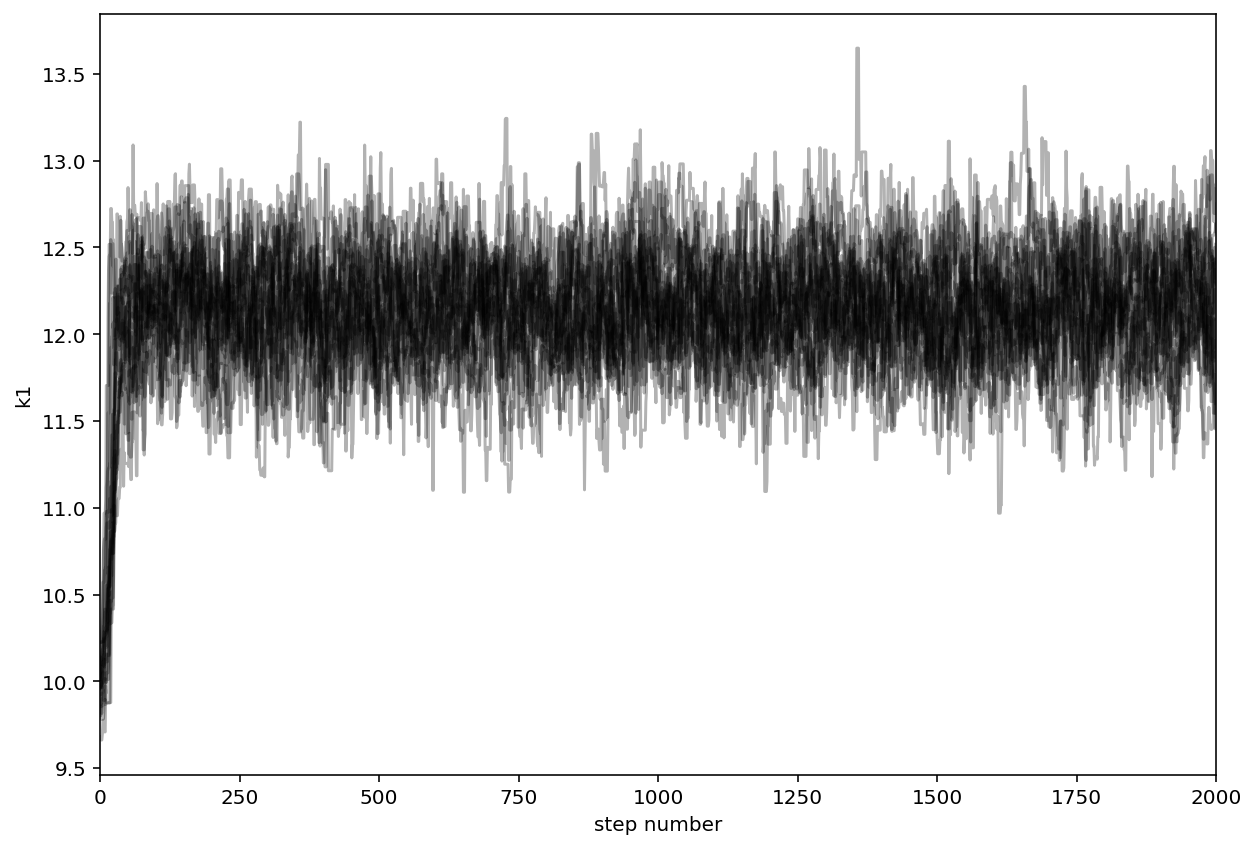

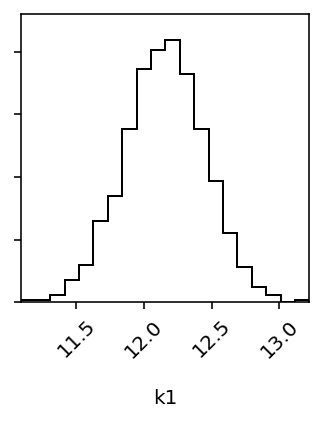

In [4]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *
import numpy as np
import pylab as plt
import pandas as pd
M = Model('toy_model.xml')
pid = initialize_mcmc(Model = M)

# Import data from CSV
# Import a CSV file for each experiment run
df = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X','time'], skiprows = 1)
pid.set_exp_data(df)
# pid.set_exp_data(list_of_dfs)
pid.set_measurements(['X'])
pid.set_time_column(['time'])

pid.set_nwalkers(20)
pid.set_init_seed(0.15)
pid.set_nsteps(2000)
pid.set_sim_type('deterministic')

pid.set_params_to_estimate(['k1'])
prior = {'k1' : ['gaussian', 10, 20]}
pid.set_prior(prior)

sampler = pid.run_mcmc(plot_show = True)
pid.plot_mcmc_results(sampler);

# Using uniform priors and estimating both `k1` and `d1`

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:21<00:00, 186.09it/s]


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file
Parameter posterior distribution convergence plots:


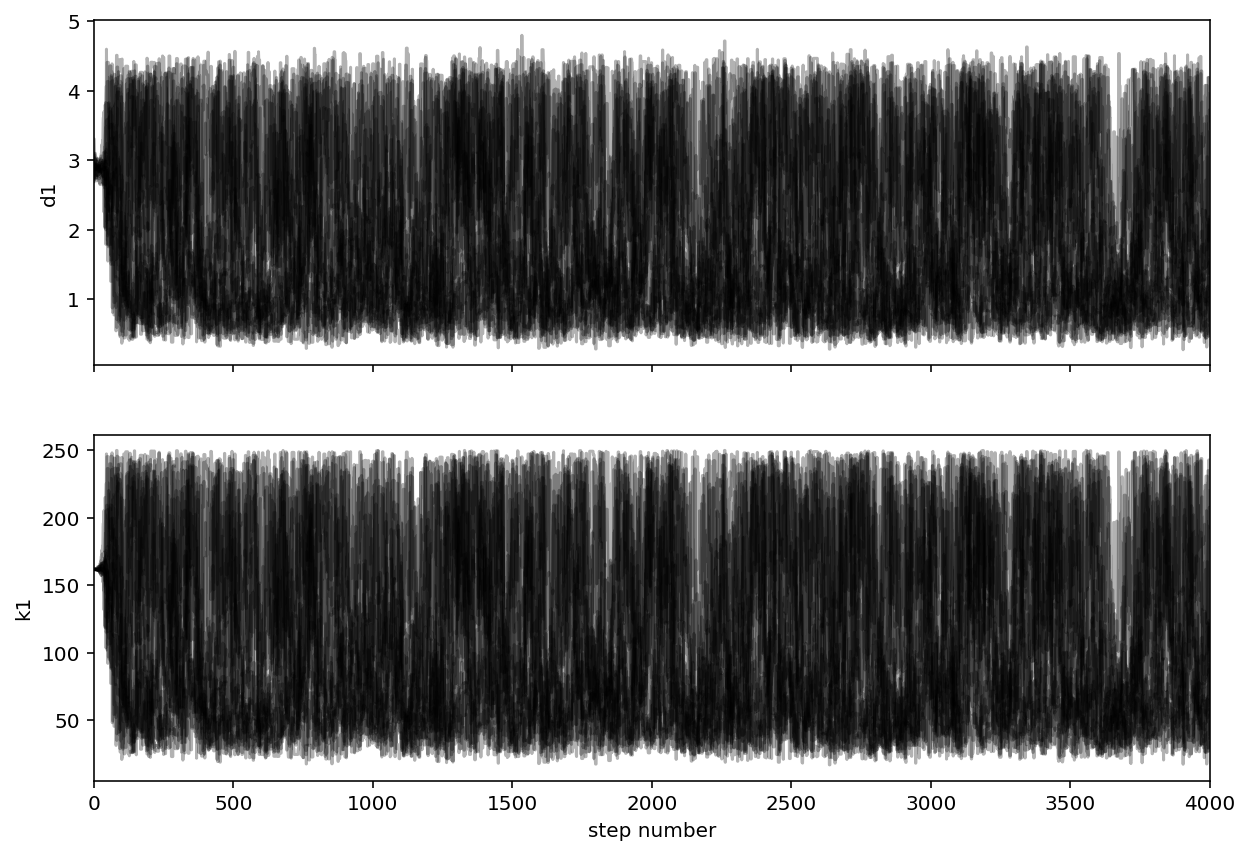

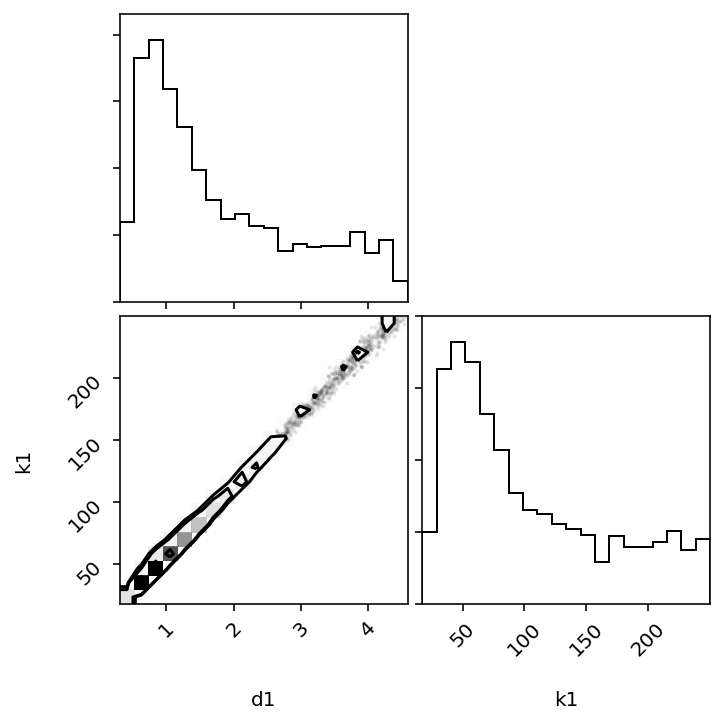

In [7]:
pid.set_params_to_estimate(['d1','k1'])
prior = {'d1' : ['uniform', 0, 20],'k1' : ['uniform', 0, 250]}
pid.set_prior(prior)
pid.set_nsteps(4000)
sampler = pid.run_mcmc(plot_show = True)
pid.plot_mcmc_results(sampler);

### Check mcmc_results.csv for the results of the MCMC procedure and perform your own analysis.

### You can also plot the results as follows

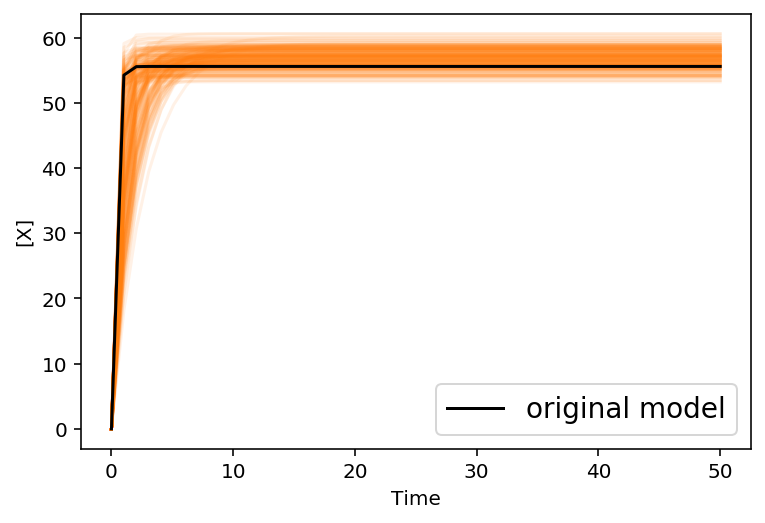

In [8]:
M_fit = Model('toy_model.xml')
timepoints = pid.timepoints
flat_samples = sampler.get_chain(discard=200, thin=15, flat=True)
inds = np.random.randint(len(flat_samples), size=200)
for ind in inds:
    sample = flat_samples[ind]
    for pi, pi_val in zip(pid.params_to_estimate, sample):
        M_fit.set_parameter(pi, pi_val)
    plt.plot(timepoints, py_simulate_model(timepoints, Model= M_fit)['X'], "C1", alpha=0.1)
# plt.errorbar(, y, yerr=yerr, fmt=".k", capsize=0)
# plt.plot(timepoints, list(pid.exp_data['X']), label = 'data')
plt.plot(timepoints, py_simulate_model(timepoints, Model = M)['X'], "k", label="original model")
plt.legend(fontsize=14)
plt.xlabel("Time")
plt.ylabel("[X]");

In [ ]:
flat_samples = sampler.get_chain(discard = 200, thin = 15,flat = True)
flat_samples

## Alll methods above have other advanced options that you can use. Refer to Parameter Identification Tools and Advanced Examples notebook for more details. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.